# __MNISTデータセットパラメータチューニング__
__MNSITデータセットをダウンロードして、CNNでの学習を行う。ハイパーパラメータは以下のとおりである__  
*****
|パラメータ|説明|選択肢|
|:-:|:-:|:--:|
|`--epoch`|エポック数|10で統一| 
|`--activation`|活性化関数|`ReLU`,`ELU`|  
|`--optimizer`|最適化手法|`Adam`,`MomentumSGD`|  
|`--weight_decay`|重み減衰|1e-10 ~ 1e-3|  
|`--adam_lr`|adam学習率|1e-5 ~ 1e-1|  
|`--momentum_sgd_lr`|sgd学習率|1e-5 ~ 1e-1|   
|`--mid_units`|結合層のユニット数|100 ~ 500|  
|`--num_layer`|畳み込みの数|3~7|
|`--num_filter`|各層のフィルタ数|16 ~ 128 の list|

各種パラメータを変更しながら、lossやtestの精度がどのように変化するのかを考察する

****
ログのファイル名は--filenameで指定できる。
以下のコマンドを実行すると、logsに記録された学習結果をtensorboardで確認することができる。

In [87]:
!tensorboard --logdir ../logs/MNIST --port 6001 --bind_all

2023-07-13 14:35:21.788530: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-13 14:35:21.810544: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-13 14:35:22.108794: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-13 14:35:22.513675: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.

***
まずoptunaでパラメータチューニングを行う。epoch数を10とし、trainを100回重ねてパラメータチューニングを行った結果を下表に示す

|optunaパラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|Adam|
|weight_decay|1.3452825924268737e-07|
|adam_lr|0.0003348252618961708|
|momentum_sgd_lr|1e-3|
|mid_units|500|
|--num_layer|5|
|num_filter|112.48.80.96.112|

ここで得られたパラメータを用いて学習を行うと以下のようになる  

[**********] 100.00% (10/10)
leaning finished


20230713 14:05:49
train_loss = 0.015777672884188642
validation_loss = 0.030251078422705177
test_acc = 0.9915


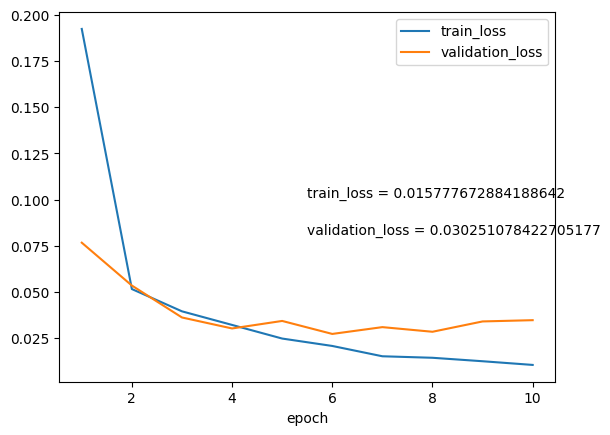

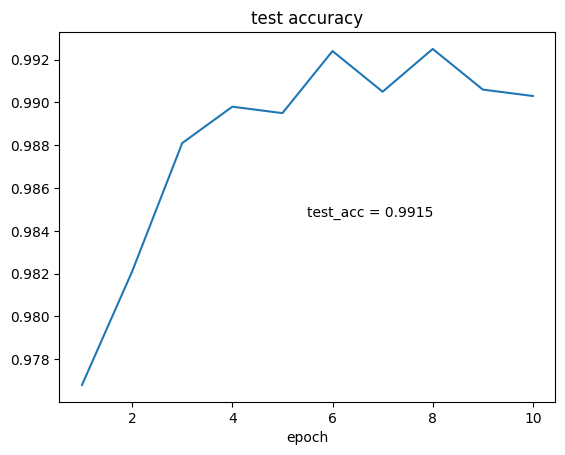

In [72]:
%run ../src/MNIST/MNIST_train.py\
--filename 'result0'

***
activationをeluにしてみる
|パラメータ|値|
|:-|-|
|<span style="color:red;">activation</span>|<span style="color:red;">elu</span>|
|optimizer|Adam|
|weight_decay|1.3452825924268737e-07|
|adam_lr|0.0003348252618961708|
|mid_units|500|
|--num_layer|5|
|num_filter|112.48.80.96.112|

[**********] 100.00% (10/10)
leaning finished


20230713 14:09:20
train_loss = 0.03626447017906224
validation_loss = 0.04639639801917747
test_acc = 0.9859


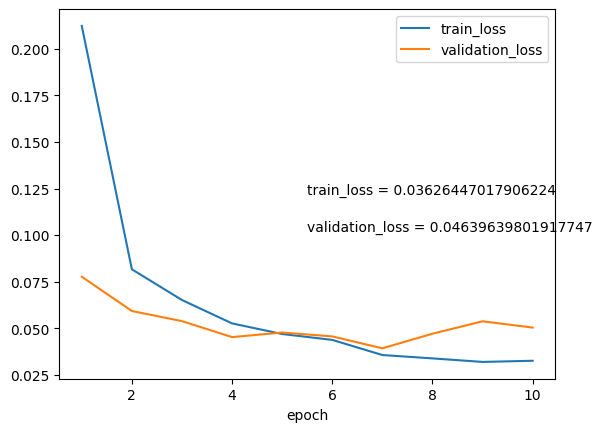

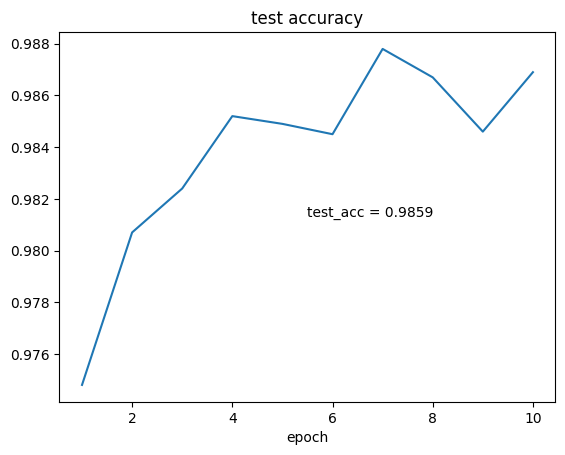

In [73]:
%run ../src/MNIST/MNIST_train.py\
--activation elu --filename 'result＿elu'

reluの場合に比べて精度が悪くなっており,lossが大きくなっていることがわかる。
****
optimizerをAdamからMomentumSGDに変更してみる

|パラメータ|値|
|:-|-|
|activation|ReLU|
|<span style="color:red;">optimizer</span>|<span style="color:red;">MomentumSGD</span>|
|weight_decay|1.3452825924268737e-07|
|momentum_sgd_lr|1e-3|
|mid_units|500|
|--num_layer|5|
|num_filter|112.48.80.96.112|

[**********] 100.00% (10/10)
leaning finished


20230713 14:10:47
train_loss = 0.07685339062421052
validation_loss = 0.06289546356392094
test_acc = 0.98095


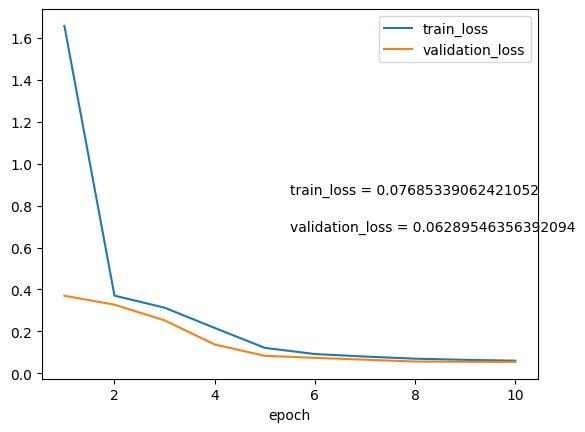

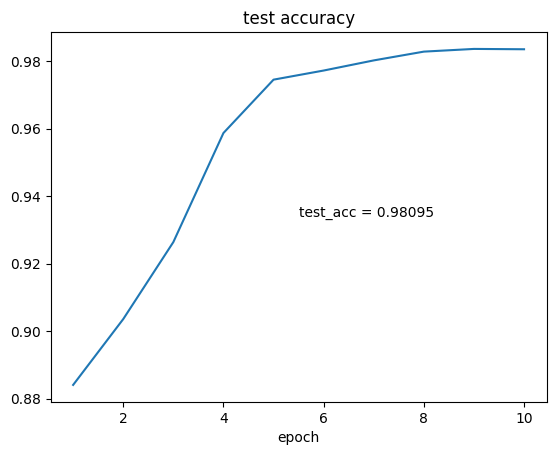

In [74]:
%run ../src/MNIST/MNIST_train.py\
--optimizer MomentumSGD --filename 'result＿MomentumSGD'

精度が98%になるまでの速度がAdamに比べて遅く、lossの値も大きくなっていることがわかる。
***
重み減衰を1e-09に縮小させても、lossの値、精度ともにそれほど変わらなかった。しかしtest精度の進捗が遅くなっている。
|パラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|Adam|
|<span style="color:red;">weight_decay</span>|<span style="color:red;">1e-09</span>|
|adam_lr|0.0003348252618961708|
|mid_units|500|
|--num_layer|5|
|num_filter|112.48.80.96.112|

[**********] 100.00% (10/10)
leaning finished


20230713 14:11:30
train_loss = 0.01428812795922164
validation_loss = 0.03203540411311833
test_acc = 0.9909000000000001


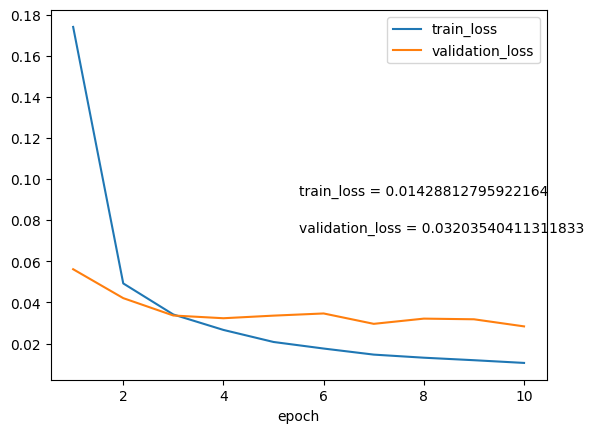

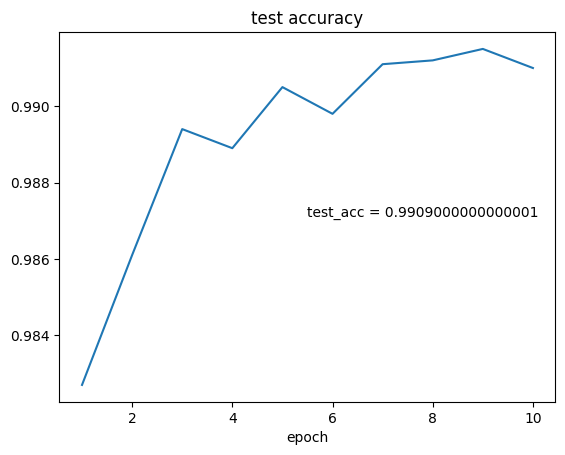

In [75]:
%run ../src/MNIST/MNIST_train.py\
--weight_decay 1e-09 --filename 'result＿weight_decay_1e09'

***
重み減衰を1e-04に変更してみる
|パラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|Adam|
|<span style="color:red;">weight_decay</span>|<span style="color:red;">1e-04</span>|
|adam_lr|0.0003348252618961708|
|mid_units|500|
|num_layer|5|
|num_filter|112.48.80.96.112|

[**********] 100.00% (10/10)
leaning finished


20230713 14:12:31
train_loss = 0.020682195469198476
validation_loss = 0.03221017894712277
test_acc = 0.9904249999999999


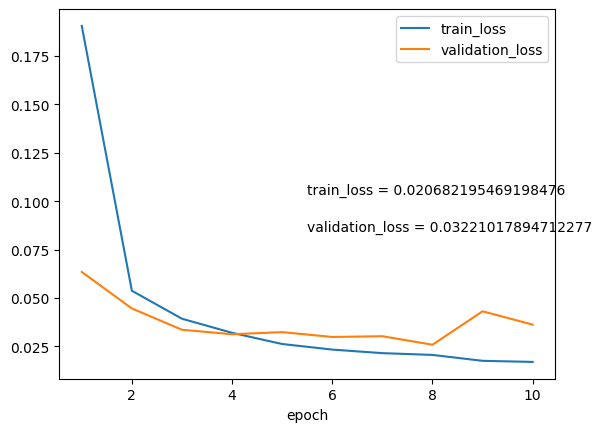

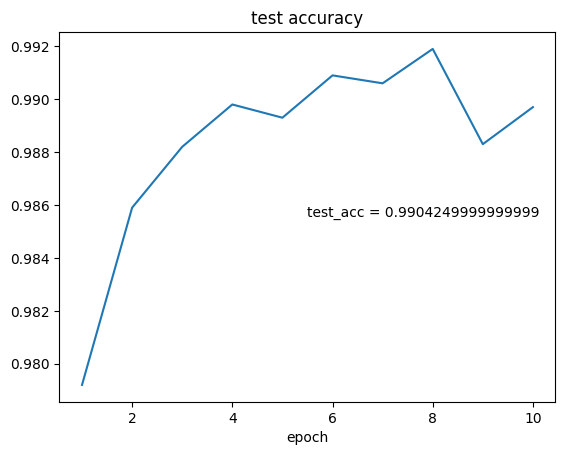

In [76]:
%run ../src/MNIST/MNIST_train.py\
--weight_decay 1e-04 --filename 'result＿weight_decay_1e04'

重み減衰パラメータを大きくしても、lossの値が大きくなるが精度に大きな差がないことがわかった。
***
adam学習率を1.5e-05に変更して小さくしてみる
|パラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|Adam|
|weight_decay|1e-06|
|<span style="color:red;">adam_lr</span>|<span style="color:red;">1.5e-5</span>|
|mid_units|500|
|--num_layer|5|
|num_filter|112.48.80.96.112|

[**********] 100.00% (10/10)
leaning finished


20230713 14:16:22
train_loss = 0.06859261085758848
validation_loss = 0.05827864450961351
test_acc = 0.981975


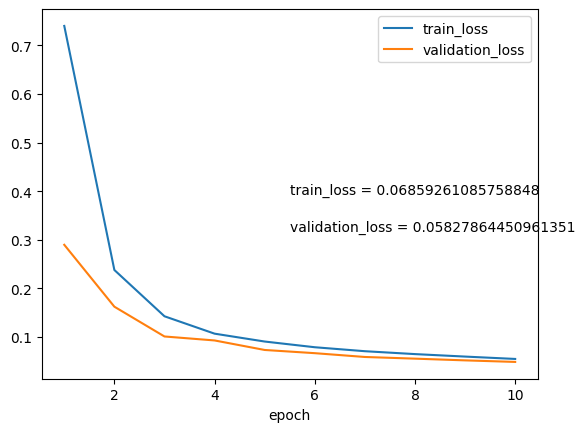

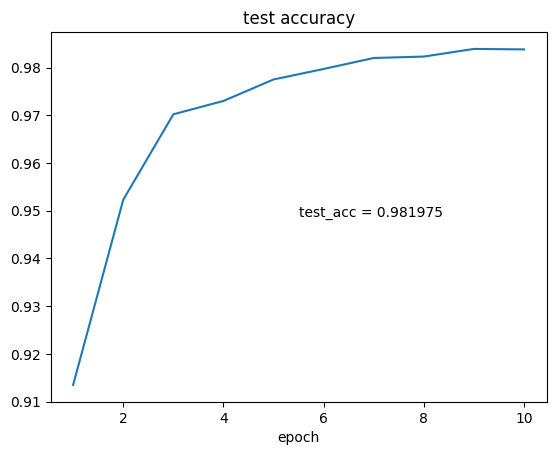

In [80]:
%run ../src/MNIST/MNIST_train.py\
--adam_lr 1.5e-05 --filename 'result_adam_lr_1p5e05'

学習率を下げると、学習の進捗が遅くなることがわかった。それに関連して、lossの値も大きくなっていた
***
adam学習率を1e-02に変更してみる
|パラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|Adam|
|weight_decay|1e-06|
|<span style="color:red;">adam_lr</span>|<span style="color:red;">1e-2</span>|
|mid_units|500|
|--num_layer|5|
|num_filter|112.48.80.96.112|

[**********] 100.00% (10/10)
leaning finished


20230714 11:54:18
train_loss = 2.304933716366286
validation_loss = 2.304488458251953
test_acc = 0.10592499999999999


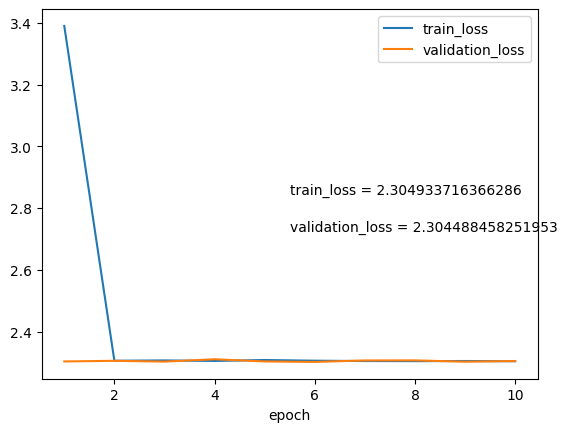

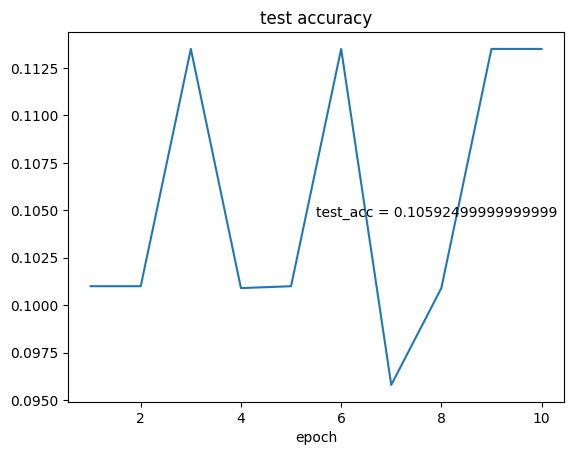

In [93]:
%run ../src/MNIST/MNIST_train.py\
--adam_lr 1e-2 --filename 'result_adam_lr_1e02'

Adam学習率を1e-2(1%ほど)と大きくしすぎると、学習が全くうまく行かないことがわかった。
***
mid_unitsを半分の250にしてみる
|パラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|Adam|
|weight_decay|1.3452825924268737e-07|
|adam_lr|0.0003348252618961708|
|<span style="color:red;">mid_units</span>|<span style="color:red;">250</span>|
|--num_layer|5|
|num_filter|112.48.80.96.112|

[**********] 100.00% (10/10)
leaning finished


20230714 10:24:39
train_loss = 0.014665359773317914
validation_loss = 0.03311424285559679
test_acc = 0.990275


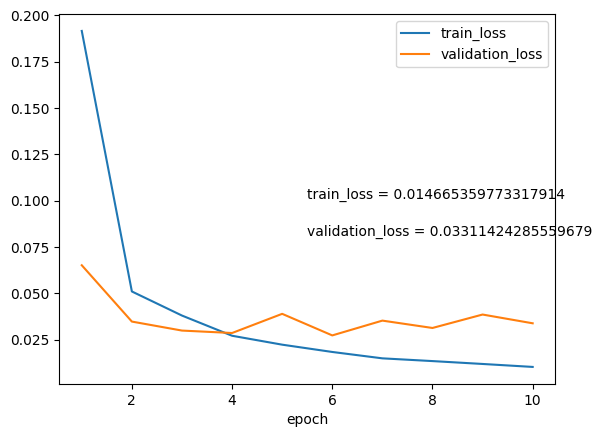

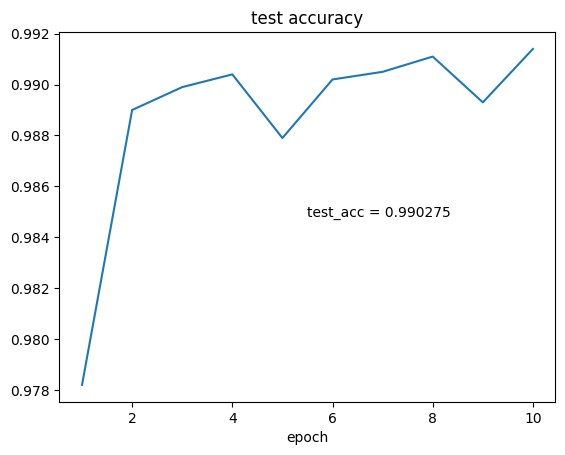

In [88]:
%run ../src/MNIST/MNIST_train.py\
--mid_units 250 --filename 'result_mid_units250'

validation_lossが大きくなったこと以外でこのパラメータ変更による結果に大きな影響は見られなかった。

***
畳み込み層の数を3にへらしてみる
|パラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|Adam|
|weight_decay|1.3452825924268737e-07|
|adam_lr|0.0003348252618961708|
|mid_units|500|
|<span style="color:red;">--num_layer</span>|<span style="color:red;">3</span>|
|<span style="color:red;">num_filter</span>|<span style="color:red;">112.96.112</span>|

[**********] 100.00% (10/10)
leaning finished


20230713 14:21:44
train_loss = 0.013294736276374852
validation_loss = 0.03445641317739282
test_acc = 0.990475


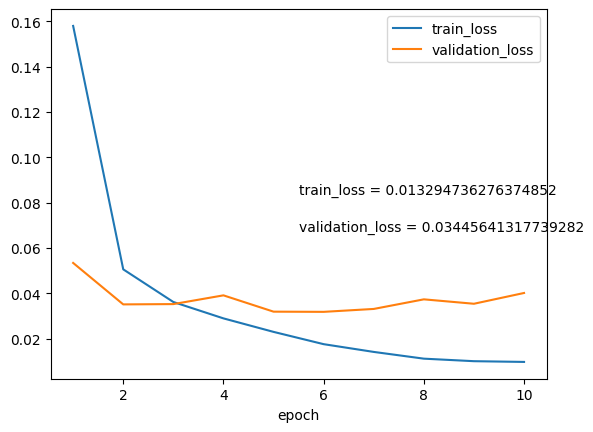

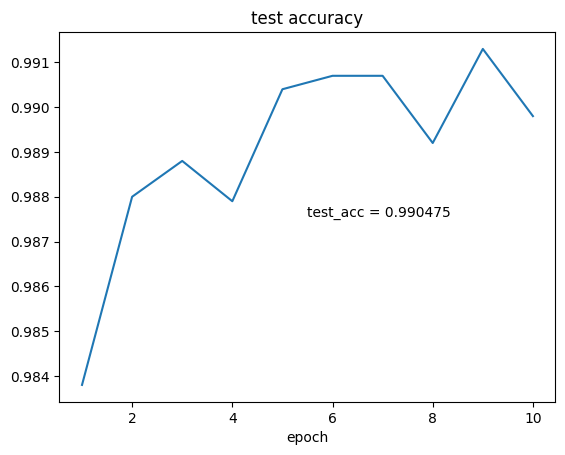

In [83]:
%run ../src/MNIST/MNIST_train.py\
--num_layer 3 --num_filter 112.96.112 --filename 'result_num_layer_3'


***
|パラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|Adam|
|weight_decay|1.3452825924268737e-07|
|adam_lr|0.0003348252618961708|
|mid_units|500|
|<span style="color:red;">--num_layer</span>|<span style="color:red;">7</span>|
|<span style="color:red;">num_filter</span>|<span style="color:red;">112.16.32.48.80.96.112</span>|

[**********] 100.00% (10/10)
leaning finished


20230713 14:24:07
train_loss = 0.02211415698410008
validation_loss = 0.03311941806128743
test_acc = 0.989675


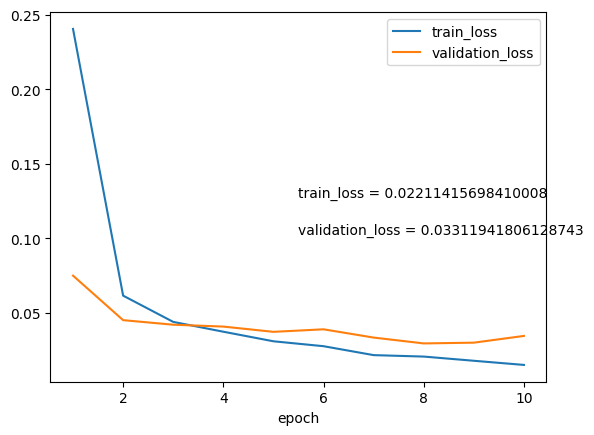

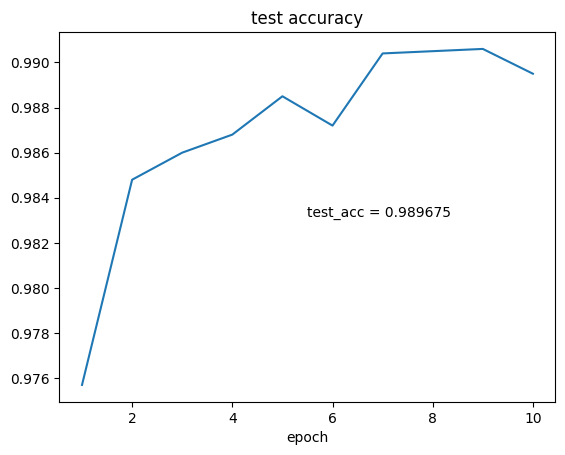

In [86]:
%run ../src/MNIST/MNIST_train.py\
--num_layer 7 --num_filter 112.16.32.48.80.96.112 --filename 'result_num_layer_7'